In [1]:
#based on https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection as  model_selection
#load the dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

# to print the attributes of the dataset

california_housing = fetch_california_housing(as_frame=True)

#The dependent variable is median house value
#Number of Instances: 20640

#Number of Attributes: 8 numeric

#Attribute Information:
#       - MedInc        median income in block group
#       - HouseAge      median house age in block group
#       - AveRooms      average number of rooms per household
#       - AveBedrms     average number of bedrooms per household
#       - Population    block group population
#       - AveOccup      average number of household members
#       - Latitude      block group latitude
#       - Longitude     block group longitude

In [2]:
# print independet variabls (x)
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# print dependent variable (y)
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [4]:
california_housing.frame.info()
#check there are any missing values (Here, in this data set there are no missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


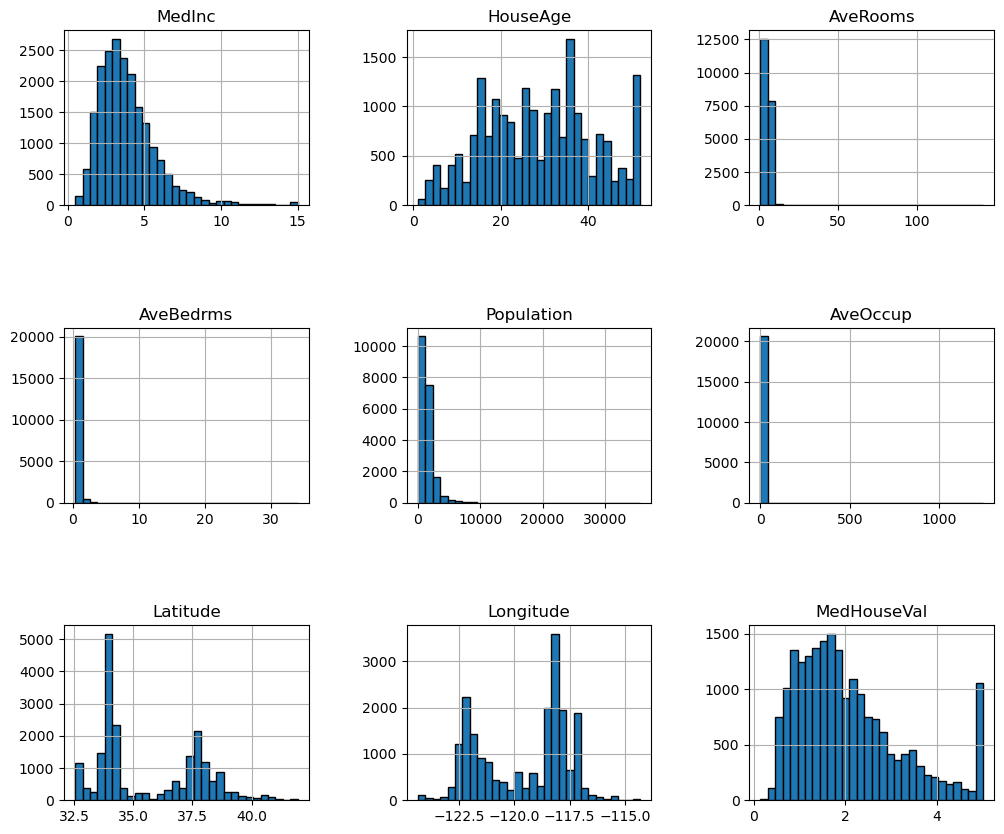

In [5]:
#visualizing data

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

average rooms, average bedrooms, average occupation, and population, the range of the data are expanded in very short range. May be they are outliers. Further check on data.

In [8]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


Large gap on 75% of value and max value, possible outliers. 
Lets select one variable for linear regression

In [9]:
features_of_interest = ["AveRooms"]
california_housing.frame[features_of_interest].describe()

,AveRooms
count,20640.000000
mean,5.429000
std,2.474173
min,0.846154
25%,4.440716
50%,5.229129
75%,6.052381
max,141.909091


In [10]:


# Load the  dataset
data_X, data_y = fetch_california_housing(return_X_y=True)

# select the "AveRooms" data
data_X=data_X[:,2]

#save index of the maximum value, will be used later
index_max=np.argmax(data_X)
max_x=data_X[index_max]
max_y=data_y[index_max]

In [11]:
#verification that we have selected correct set
print(np.max(data_X),np.min(data_X),np.mean(data_X))

141.9090909090909 0.8461538461538461 5.428999742190376


In [12]:
#we have lot of data samples, just select 100 of them
data_X=data_X[100:200]
data_y=data_y[100:200]
#remember index starts from 0
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val  = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print("Total dataset elements",data_X.shape)
print("Train dataset elements",X_train.shape)
print("Validatiom dataset elements",X_val.shape)
print("Test dataset elements",X_test.shape)



Total dataset elements (100,)
Train dataset elements (60,)
Validatiom dataset elements (20,)
Test dataset elements (20,)


In [13]:
#rashape data as vectors
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)
X_val = X_val.reshape(X_val.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
yval = y_val.reshape(y_val.shape[0], 1)


In [14]:

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The intercept
print("Coefficients: \n", regr.intercept_)



Coefficients: 
 [[0.5105445]]
Coefficients: 
 [-0.20304646]


In [20]:
yhat=regr.predict(X_train)

RSS = np.sum((yhat - y_train)**2)
print('RSS=', RSS)
N=len(y_train)
print(N)
RSE = np.sqrt(1/(N-2)*RSS)
print('RSE=', RSE)
TSS = np.sum((y_train- np.mean(y_train))**2)
print('TSS=', TSS)
# Residual Sum of Sqaures (RSS)
RSS = np.sum((yhat - y_train)**2)
# Residual Standard Error (RSE)

RSE = np.sqrt(1/(N-2)*RSS)
# Total Sum of Squares (TSS)
TSS = np.sum((y_train - np.mean(y_train))**2)
R2 = (TSS - RSS)/TSS
print('R2=', R2)
# Calculation of R2 using sklearn
R2 = regr.score(X_train,y_train)

print('R2 =', R2)


RSS= 21.895688808521484
60
RSE= 0.6144199508552689
TSS= 49.8547606
R2= 0.5608104713570425
R2 = 0.5608104713570425


In [29]:
from scipy.stats import t


w_1=regr.coef_
w_0=regr.intercept_
sigma2 = np.var(y_train - yhat)
SE2w0 =  sigma2*(1/N + np.mean(X_train)**2/np.sum((X_train - np.mean(X_train))**2))
SE2w1 = sigma2/np.sum((X_train - np.mean(X_train))**2)
tw1 = (w_1 - 0)/np.sqrt(SE2w1)
tw0 = (w_0 - 0)/np.sqrt(SE2w0)

print('Standard errors for intecept and w1: ', SE2w0, SE2w1)
print('t-statistic for intecept and w1: ', tw0, tw1)
pw1 = t.sf(np.abs(tw1), N-2)

pw0 = t.sf(np.abs(tw0), N-2)
print('pvale  for intecept and w1: ', pw0, pw1)

Standard errors for intecept and w1:  0.0897170842614373 0.0034021371404027822
t-statistic for intecept and w1:  [-0.67788785] [[8.75301542]]
pvale  for intecept and w1:  [0.25026914] [[1.69850512e-12]]


Mean squared error: 0.28
Coefficient of determination: 0.75


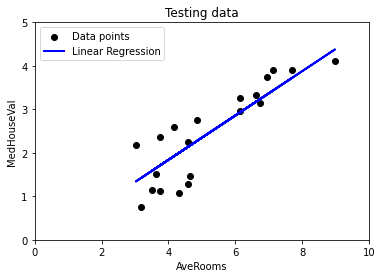

In [84]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)



# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Data points')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Testing data")
plt.show()

Coefficients: 
 [[0.0221863]]
intercept: 
 [2.23035286]


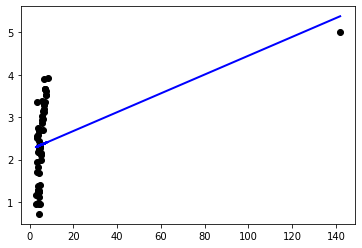

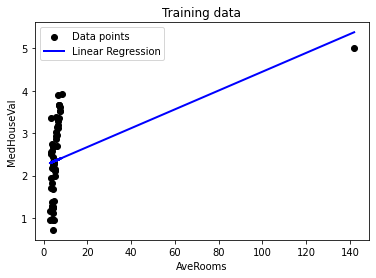

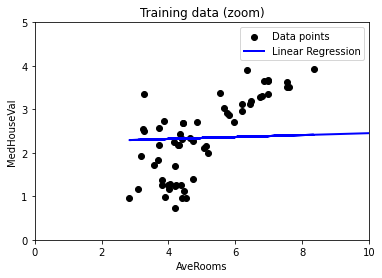

Coefficients: 
 [[0.0221863]]
Coefficients: 
 [2.23035286]


In [86]:
#Impact of outliers
# load maximum x value and corresponding y value to the training dataset
X_train[59,:]=max_x
y_train[59,:]=max_y
# Train the model using the training sets
regr.fit(X_train, y_train)
# The coefficients
print("Coefficients: \n", regr.coef_)
print("intercept: \n", regr.intercept_)

#see how training line look like


# Plot outputs
plt.scatter(X_train, y_train, color="black", )
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2)

plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.title("Training data")
plt.show()
plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Training data (zoom)")
plt.show()


# The coefficients
print("Coefficients: \n", regr.coef_)
# The intercept
print("Coefficients: \n", regr.intercept_)

Mean squared error: 1.06
Coefficient of determination: 0.05


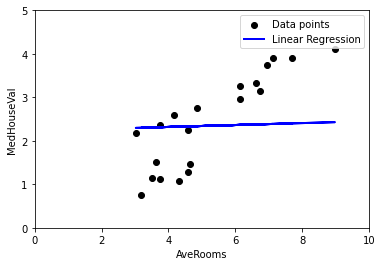

In [31]:
# see the predictions using the testing set, where modelled trained with an outlier
y_pred = regr.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))




# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Data points')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Testing data")
plt.show()

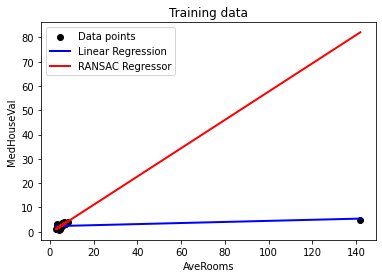

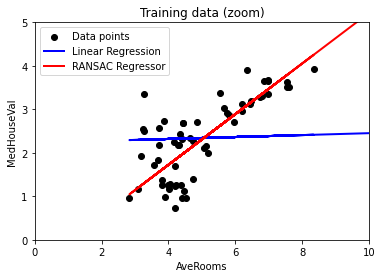

In [59]:
# RANSAC (RANdom SAmple Consensus)
# Train the model using the training sets
ransac = linear_model.RANSACRegressor()
#The RANSAC regressor automatically splits the data into inliers and outliers, and the fitted line is determined only by the identified inliers.


ransac.fit(X_train, y_train)




# Plot outputs

plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')
plt.plot(X_train, ransac.predict(X_train), color="red", linewidth=2, label=r'RANSAC Regressor')

plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.title("Training data")
plt.show()
plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')
plt.plot(X_train, ransac.predict(X_train), color="red", linewidth=2, label=r'RANSAC Regressor')

plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Training data (zoom)")
plt.show()



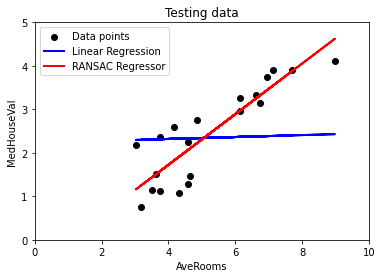

In [71]:
line_y_ransac = ransac.predict(X_test)
# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Data points')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label=r'Linear Regression')
plt.plot(X_test, line_y_ransac, color="red", linewidth=2, label=r'RANSAC Regressor')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Testing data")
plt.show()


Polynomial Regression


Automatically created module for IPython interactive environment


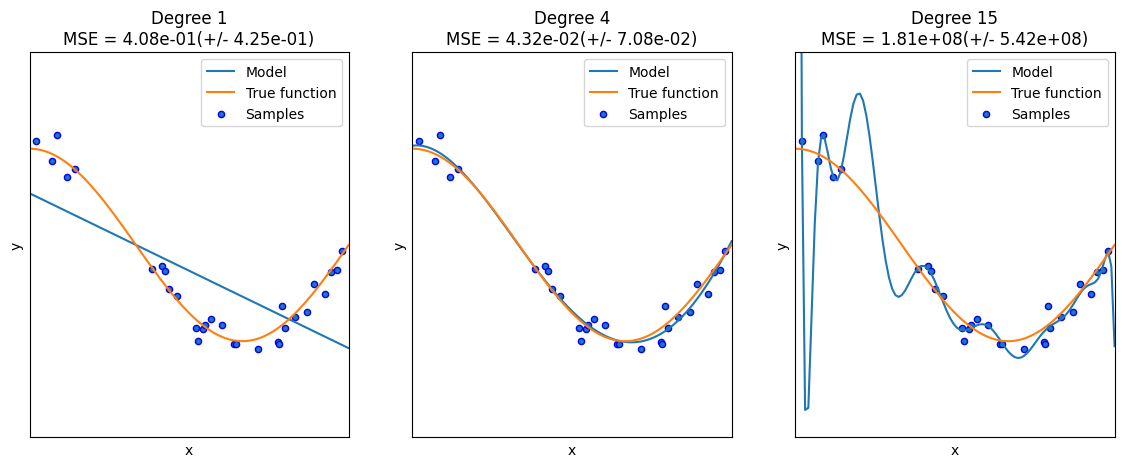

In [1]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

# plt.savefig('./figures/polynomial_regresion.png')        
plt.show()

Polynomial Ridge Regression

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
alpha = 0.0001 # lambda in the slides

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    ridge = linear_model.Ridge(alpha=alpha, fit_intercept=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge_regresssion", ridge)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

# plt.savefig('./figures/polynomial_ridge_regresion.png')        
plt.show()

Ridge Coefficients as a Function of the Regularization

In [ ]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('$\lambda$')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
# plt.savefig('./figures/redge_coeff_regularization.png')
plt.show()

LASSO

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data with informative and irrelevant features
X, y, true_coefficients = make_regression(
    n_samples=100, n_features=50, n_informative=10, noise=20.5, coef=True, random_state=42
)

# Create a Lasso regression model
lasso_model = Lasso(alpha=3)  # Alpha is the regularization strength

# Fit the Lasso regression model to the data
lasso_model.fit(X, y)

# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the Linear Regression model to the data
linear_model.fit(X, y)

# Plot the true coefficients and the estimated coefficients for Lasso and Linear Regression
plt.figure(figsize=(10, 6))

plt.plot(true_coefficients, label='True Coefficients', marker='o')
plt.plot(lasso_model.coef_, label='Lasso Regression', marker='x')
plt.plot(linear_model.coef_, label='Linear Regression', marker='s')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('True vs. Estimated Coefficients')
plt.legend()
plt.grid()
plt.show()



print("Number of non-zero coefficients (Linear Regression):", np.sum(linear_model.coef_ != 0))
print("Number of non-zero coefficients (Lasso Regression):", np.sum(lasso_model.coef_ != 0))



In [ ]:
plt.figure(figsize=(12, 6))

# Plot the true coefficients as stem plot
plt.stem(range(len(true_coefficients)), true_coefficients, markerfmt='go', linefmt='g', basefmt=' ')

# Plot the Lasso coefficients as stem plot with a small offset
plt.stem(np.arange(len(true_coefficients)) + 0.3, lasso_model.coef_, markerfmt='rx', linefmt='r', basefmt=' ')

# Plot the Linear Regression coefficients as stem plot with a larger offset
plt.stem(np.arange(len(true_coefficients)) + 0.5, linear_model.coef_, markerfmt='bs', linefmt='b', basefmt=' ')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('True vs. Estimated Coefficients')
plt.legend(['True Coefficients', 'Lasso Regression', 'Linear Regression'])
plt.grid()
plt.show()

Multi Variable Linear regression

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection as  model_selection
#load the dataset
from sklearn.datasets import fetch_california_housing

# Load the diabetes dataset
data_X, data_y = fetch_california_housing(return_X_y=True)

#remember index starts from 0
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val  = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print("Total dataset elements",data_X.shape)
print("Train dataset elements",X_train.shape)
print("Validatiom dataset elements",X_val.shape)
print("Test dataset elements",X_test.shape)

Total dataset elements (20640, 8)
Train dataset elements (12384, 8)
Validatiom dataset elements (4128, 8)
Test dataset elements (4128, 8)


In [31]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The intercept
print("Coefficients: \n", regr.intercept_)

y_pred = regr.predict(X_test)



# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#see the impact of each variable

regr_coef=regr.coef_/np.max(regr.coef_)
print("Coefficients: \n", regr_coef)
#Here, value=1 is the most relevant feature.
california_housing = fetch_california_housing(as_frame=True)
california_housing.data.head()

Coefficients: 
 [ 4.52681080e-01  9.44835024e-03 -1.30201996e-01  8.24878307e-01
 -5.84727391e-06 -7.62397662e-03 -4.06305340e-01 -4.18414937e-01]
Coefficients: 
 -35.66840017162287
Mean squared error: 0.53
Coefficient of determination: 0.59
Coefficients: 
 [ 5.48785288e-01  1.14542353e-02 -1.57843885e-01  1.00000000e+00
 -7.08865036e-06 -9.24254711e-03 -4.92563977e-01 -5.07244443e-01]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [39]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

# Assuming you have already fitted the linear regression model (regr.fit(X_train, y_train))

# Add a constant column to the feature matrix (required by statsmodels)
X_train_with_constant = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_constant).fit()

# Get summary statistics of the model
summary = ols_model.summary()

# Extract p-values from the summary for all features
p_values = summary.tables[1].data[1:]

# Create a DataFrame to associate p-values with feature names
p_values_df = pd.DataFrame(p_values, columns=['Feature', 'Coefficient', 'Standard Error', 't-value', 'P-Value', 'Lower CI', 'Upper CI'])
p_values_df['P-Value'] = p_values_df['P-Value'].astype(float)


print(summary)
print(p_values_df)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2461.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:47:15   Log-Likelihood:                -13464.
No. Observations:               12384   AIC:                         2.695e+04
Df Residuals:                   12375   BIC:                         2.701e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.6684      0.849    -42.006      0.0

In [38]:
from scipy import stats
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_train)

newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b



sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)

params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"] = [params,sd_b,ts_b]
print(myDF3)

   Coefficients  Standard Errors  t values
0      -35.6684            0.849   -42.006
1        0.4527            0.006    81.204
2        0.0094            0.001    16.493
3       -0.1302            0.008   -16.185
4        0.8249            0.041    20.252
5       -0.0000            0.000    -0.951
6       -0.0076            0.001    -6.442
7       -0.4063            0.009   -43.858
8       -0.4184            0.010   -43.176
